# Analysis of selected funds

In [2]:
import feather

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy import sparse

In [4]:
path = '../data/info_df_total.feather'
info_df = feather.read_dataframe(path)

In [5]:
info_df.sample(5)

,port_ID,port_no,report_dt,index_fund_flag,et_flag,crsp_obj_cd,mutual_fund,s_crsp_obj_cd
166727,1032627-2017-06-30,1032627.0,2017-06-30,N,N,EDYG,Y,EDYG
175024,1032981-2015-05-31,1032981.0,2015-05-31,N,N,O,Y,O
38993,1029011-2012-11-30,1029011.0,2012-11-30,D,F,I,N,I
178742,1033103-2017-03-31,1033103.0,2017-03-31,D,F,EDYB,N,EDYB
168009,1032709-2014-08-31,1032709.0,2014-08-31,N,N,EF,Y,EF


## Distribution by date

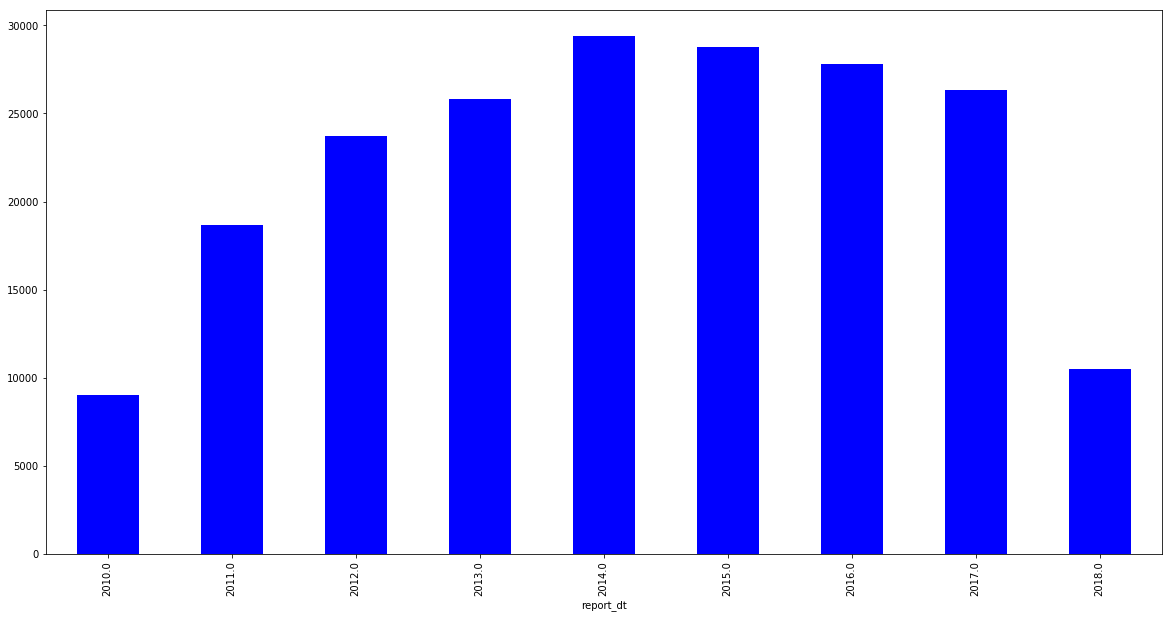

In [6]:
# Analysis of selected funds

## Distribution by date(info_df["report_dt"]
(info_df["port_no"]
    .groupby([
         info_df["report_dt"].dt.year,
#         info_df["report_dt"].dt.month
     ])
     .count()
     .plot(kind="bar",
           color = 'b',
          figsize=(20,10)))

## Distribution by number of observations per fund 

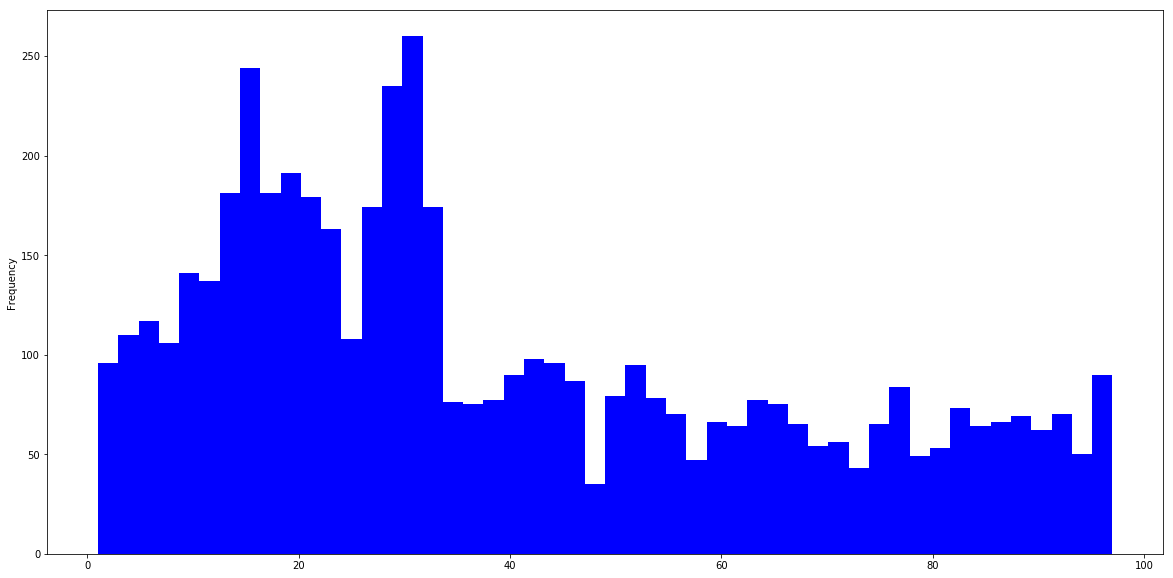

In [7]:
(info_df["port_no"]
     .groupby([
         info_df["port_no"],
     ])
     .count()
     .plot(kind="hist",
           bins = 50,
           color = 'b',
           figsize=(20,10)))

## Distribution by crsp_obj_cd

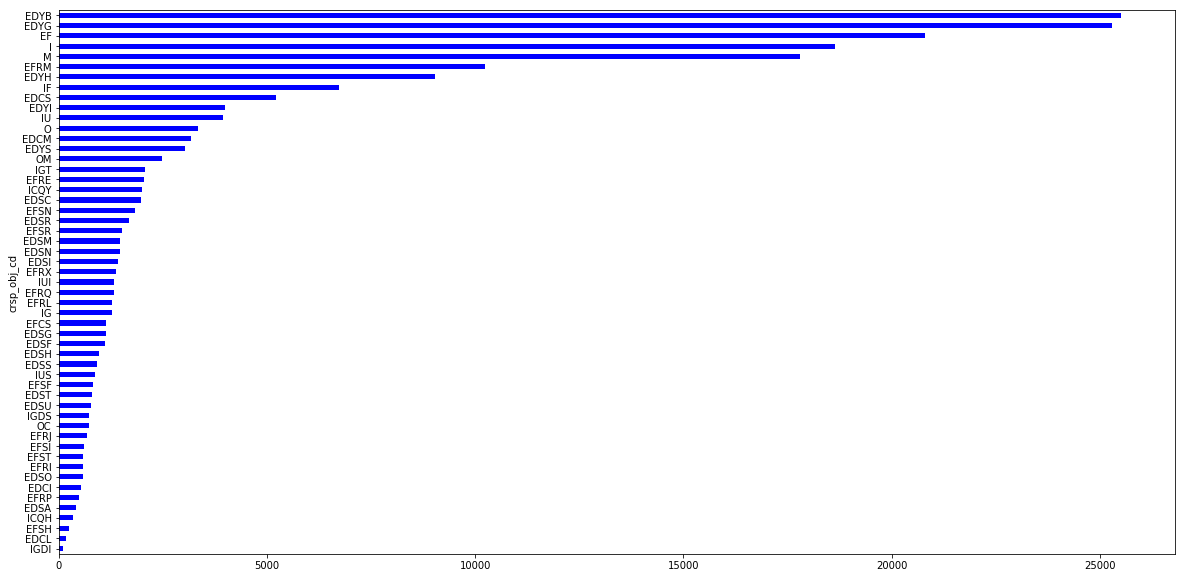

In [8]:
(info_df["port_no"]
     .groupby([
         info_df["crsp_obj_cd"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

## Distribution by flags

B = Index-based fund
D = Index fund
E = Index fund enhanced

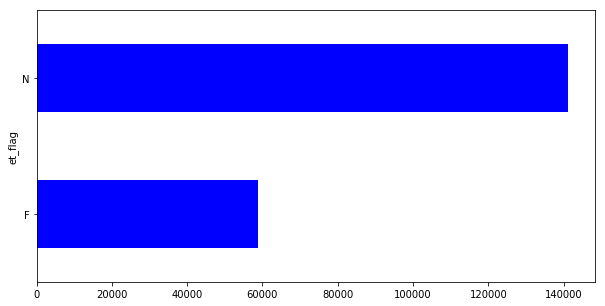

In [9]:
(info_df["et_flag"]
     .groupby([
         info_df["et_flag"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

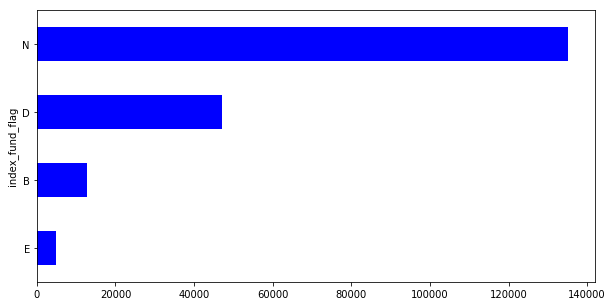

In [10]:
(info_df["index_fund_flag"]
     .groupby([
         info_df["index_fund_flag"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

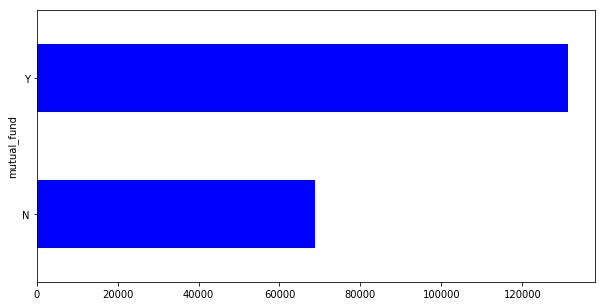

In [11]:
(info_df["mutual_fund"]
     .groupby([
         info_df["mutual_fund"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(10,5)))

## Distribution by crsp_obj_cd for mutual funds

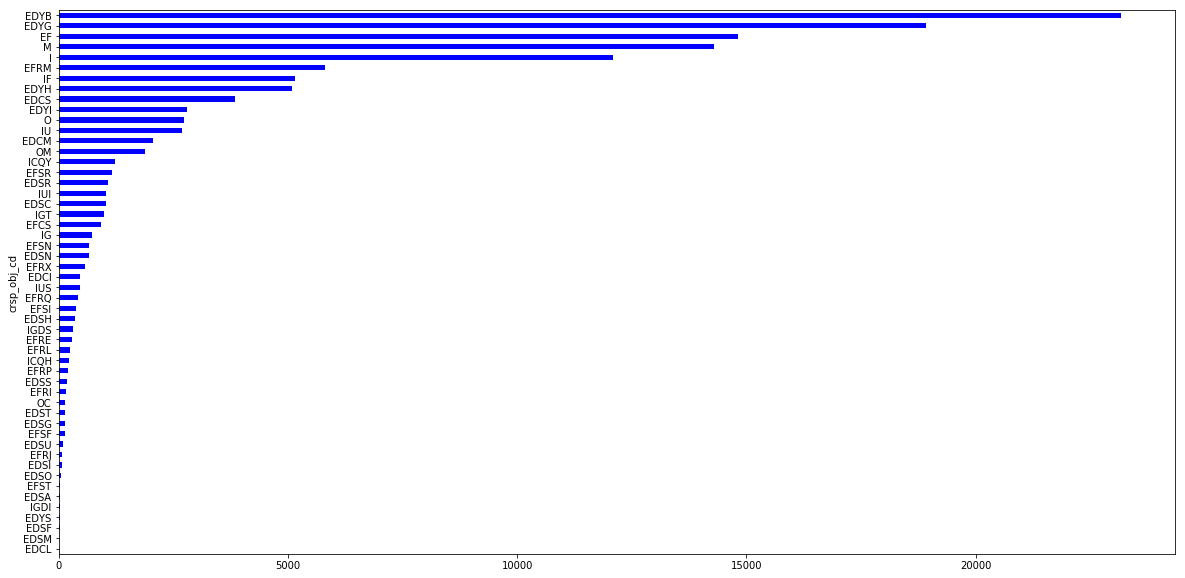

In [12]:
(info_df.loc[info_df['mutual_fund'] == 'Y',"port_no"]
     .groupby([
         info_df["crsp_obj_cd"],
     ])
     .count()
     .sort_values()
     .plot(kind="barh",
           color = 'b',
           figsize=(20,10)))

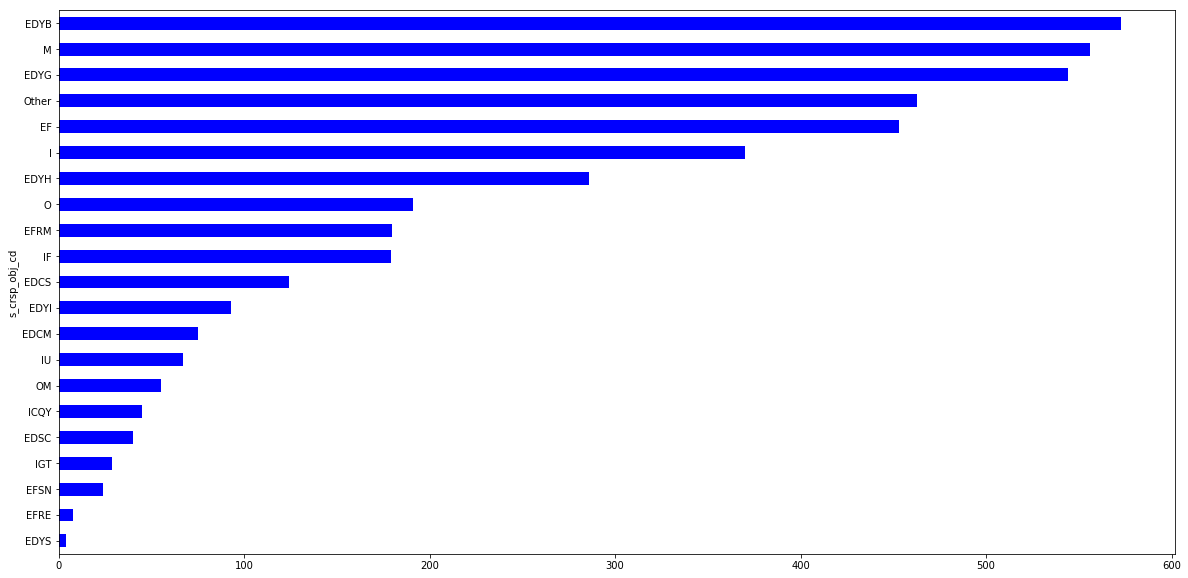

In [13]:
(info_df.loc[info_df['mutual_fund'] == 'Y',"port_no"]
    .groupby([
        info_df["s_crsp_obj_cd"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="barh",
          color = 'b',
          figsize=(20,10))
)

In [14]:
plt.rc('font', size=20)          # controls default text sizes

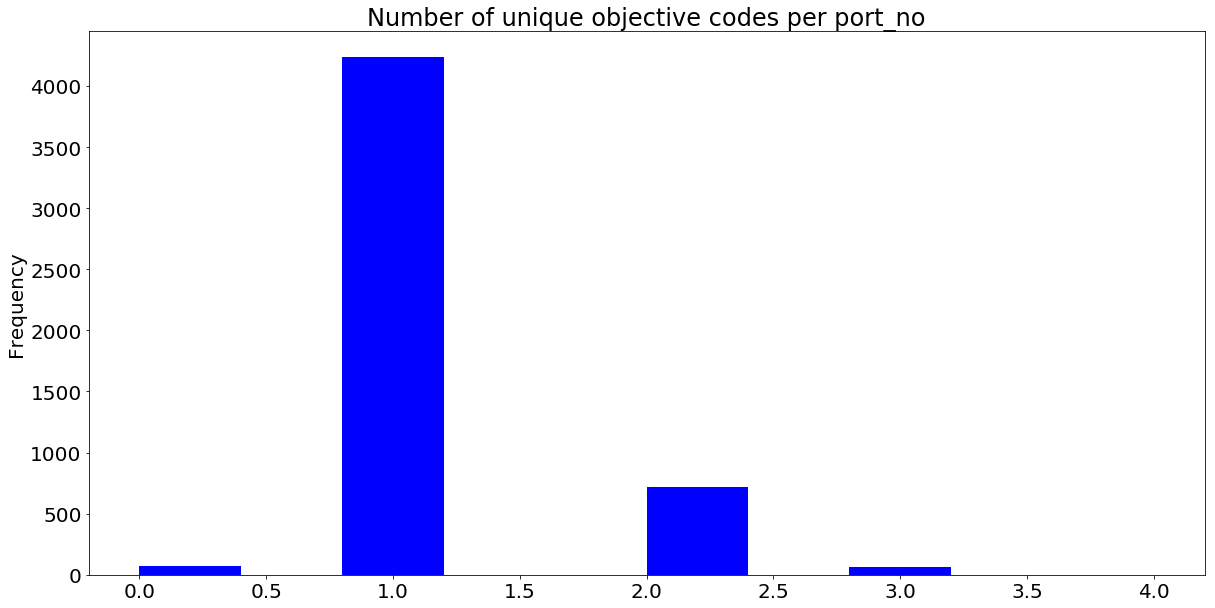

In [15]:
obj_per_portno = info_df[['port_no','crsp_obj_cd']]
ax = (obj_per_portno["crsp_obj_cd"]
    .groupby([
        obj_per_portno["port_no"]
    ])
    .nunique()
    .sort_values()
    .plot(kind="hist",
          color = 'b',
          bins = 10,
          figsize=(20,10),
          title='Number of unique objective codes per port_no')
)